## This model seeks to find a difference in accuracy when the column cabin is dropped and when it's values are converted to dummy variables using the pandas library.

### Findings
I noticed that the accuracy reduced from 0.81 to 0.79 when i converted Cabin values to dummy variables.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file

In [2]:
file_path = 'C:\\Users\\User\\Downloads\\titanic.csv'  
train = pd.read_csv(file_path)

# Exploratory data analysis
# Missing data

<Axes: >

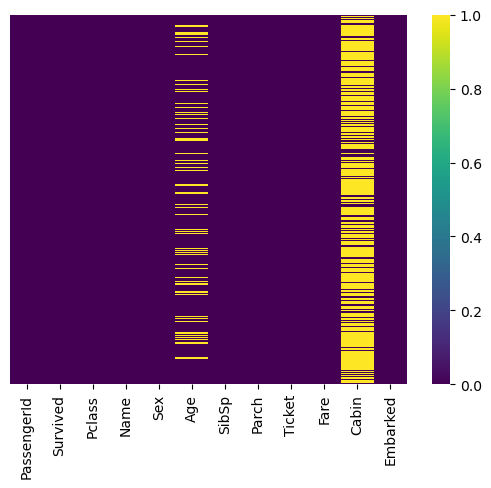

In [3]:
#visualize missing values using heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="viridis")

# Data Cleaning
We want to fill in missing data, instead of dropping the missing age data rowa. we can do this by filling in the mean age of the passangers(imputation). We can also check average age by passenger class

In [4]:
train['Age'].mean()

29.69911764705882

<Axes: xlabel='Pclass', ylabel='Age'>

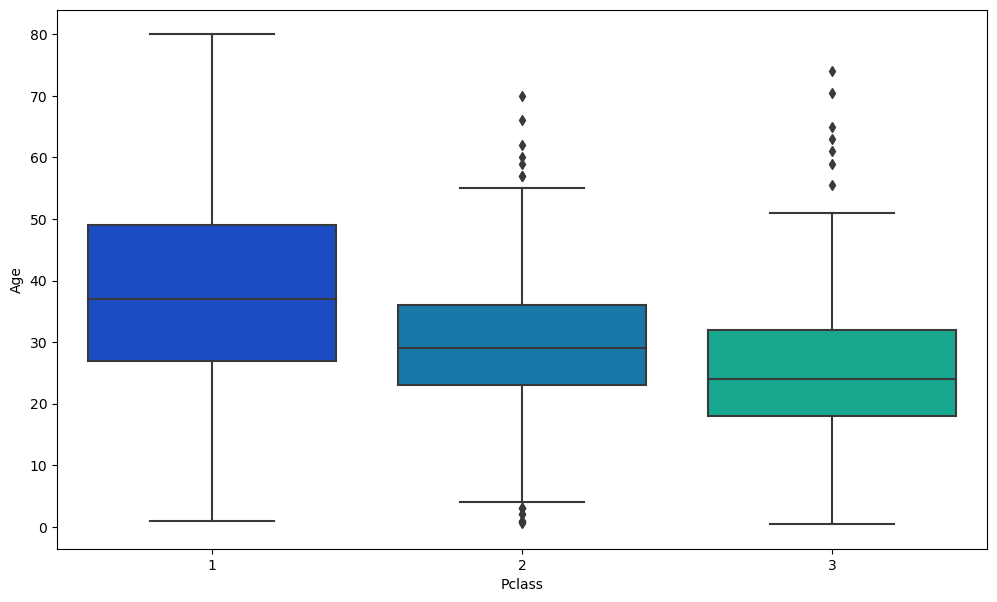

In [5]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Use average age values to impute based on Pclass and age

In [6]:
#define a function impute_age which will return the mean age based on the Pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else: 
            return 24
        
    else: 
        return Age
    

In [7]:
#apply the function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

# Converting Categorical Features
We need to convert categorical features to dummy variables using pandas to enable our model to directly take in those features as inputs. Convert sex,embark and cabin


In [9]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [10]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [11]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [12]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [16]:
Cabin = pd.get_dummies(train['Cabin'].notna(), drop_first=True)

In [17]:
Cabin.columns = ['Cabin']
Cabin

,Cabin
0,0
1,1
2,0
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [19]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [20]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [22]:
train=pd.concat([train,sex,embark,Cabin],axis=1)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Cabin
0,1,0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0


In [43]:
#Looking at missing values, we notice that there are no columns with missing values
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
Cabin          0
dtype: int64

# Building a Logistic Regression model
Start by splitting data into a training set and test set

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'],test_size=0.20,
                                                    random_state=101)

In [26]:
X_train.shape

(712, 10)

In [27]:
y_train.shape

(712,)

In [28]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Cabin
733,734,2,23.0,0,0,13.00,1,0,1,0
857,858,1,51.0,0,0,26.55,1,0,1,1
81,82,3,29.0,0,0,9.50,1,0,1,0
319,320,1,40.0,1,1,134.50,0,0,0,1
720,721,2,6.0,0,1,33.00,0,0,1,0


In [29]:
y_train.head()

733    0
857    1
81     1
319    1
720    1
Name: Survived, dtype: int64

In [30]:
X_test.shape

(179, 10)

Training and predicting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel

LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

# Model Evaluation
We can check precison, recall,f1score using classification report

In [37]:
from sklearn.metrics import auc,accuracy_score, classification_report, log_loss,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.83      0.68      0.74        80

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179



Axes(0.125,0.11;0.62x0.77)


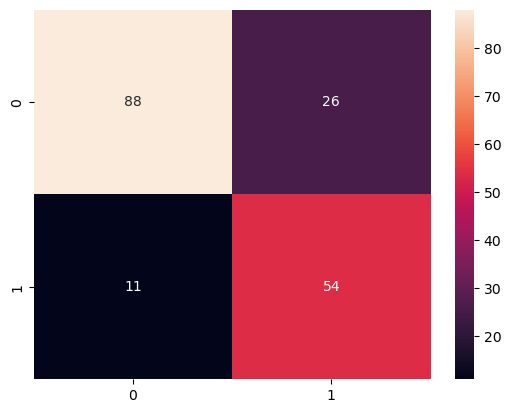

In [39]:
print(sns.heatmap(confusion_matrix(predictions, y_test),annot=True))

In [40]:
import scikitplot as skplt

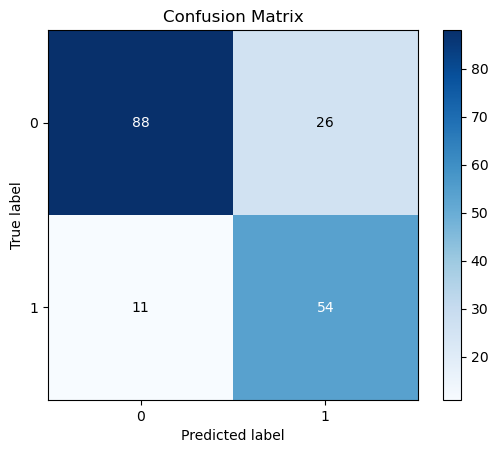

In [41]:
skplt.metrics.plot_confusion_matrix(predictions,y_test)
plt.show()